## Machine Learning to predict car prices 

### In this document, I have used linear regression to predict car prices based on number of doors, number of cylinders, engine size, horsepower(HP), city milleage, and highway milleage. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cardata = pd.read_csv(r'C:\Users\abdul\Downloads\car_data.csv')
cardata.head(10)

,Car_Name,Doors,Cylinder_no,Engine_size,HP,Citympg,Highwaympg,Price
0,alfa-romero giulia,2,4,130,111,21,27,13495.000
1,alfa-romero stelvio,2,4,130,111,21,27,16500.000
2,alfa-romero Quadrifoglio,2,6,152,154,19,26,16500.000
3,audi 100 ls,4,4,109,102,24,30,13950.000
4,audi 100ls,4,5,136,115,18,22,17450.000
5,audi fox,2,5,136,110,19,25,15250.000
6,audi 100ls,4,5,136,110,19,25,17710.000
7,audi 5000,4,5,136,110,19,25,18920.000
8,audi 4000,4,5,131,140,17,20,23875.000
9,audi 5000s (diesel),2,5,131,160,16,22,17859.167


### Shortlisted columns  

In [5]:
cardataset = cardata[['Doors', 'Cylinder_no', 'Engine_size', 'HP', 'Citympg', 'Highwaympg', 'Price']]
cardataset

,Doors,Cylinder_no,Engine_size,HP,Citympg,Highwaympg,Price
0,2,4,130,111,21,27,13495.0
1,2,4,130,111,21,27,16500.0
2,2,6,152,154,19,26,16500.0
3,4,4,109,102,24,30,13950.0
4,4,5,136,115,18,22,17450.0
...,...,...,...,...,...,...,...
200,4,4,141,114,23,28,16845.0
201,4,4,141,160,19,25,19045.0
202,4,6,173,134,18,23,21485.0
203,4,6,145,106,26,27,22470.0


### Data cleaning

In [9]:
cardataset.dropna(inplace=True)
cardataset = cardataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

C:\Users\abdul\AppData\Local\Temp\ipykernel_27596\59361323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardataset.dropna(inplace=True)


### Splitting data into response and features based on dependent and independent variables. 
### The independent variables are number of doors, number of cylinders, engine size, horsepower(HP), city milleage, and highway milleage. The dependent variable is price 

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
features = ['Doors', 'Cylinder_no', 'Engine_size', 'HP', 'Citympg', 'Highwaympg'] # features names
X = cardataset[features] 
Y = cardataset['Price']

In [14]:
X.head(5)

,Doors,Cylinder_no,Engine_size,HP,Citympg,Highwaympg
0,2,4,130,111,21,27
1,2,4,130,111,21,27
2,2,6,152,154,19,26
3,4,4,109,102,24,30
4,4,5,136,115,18,22


In [15]:
Y.head(5)

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: Price, dtype: float64

### Testing and training of the data set 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [22]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.7987146604478798


In [23]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is  {}'.format(my_linear_regression.coef_[0]))
print('The coef (b_2) is  {}'.format(my_linear_regression.coef_[1]))

The intercept (b_0) is  -4750.1557236158405
The coef (b_1) is  450.14023308475265
The coef (b_2) is  -282.28962014835446


In [24]:
car_price_pred = my_linear_regression.predict(X_test)
car_price_pred 

array([ 5804.51419295, 20691.49053477, 14328.27744751,   304.52904781,
       11232.61445934, 15706.42584516,  5925.94365664,  7129.65380596,
       22169.33958082,  6968.41384238, 17593.63794069, 30968.77093558,
        7189.08133491, 11739.63301371,  6464.07910653, 15706.42584516,
       13218.23070929, 15228.55791368,  9546.66195133,  6469.25056136,
       11464.06845998, 12951.15684928, 12317.95024312, 15706.42584516,
       21238.84518451,  6888.25262004,  7712.43298607, 12951.15684928,
        8042.63460837,  6722.16507829,  9206.55646651, 10612.5651439 ,
       17941.82066393, 12186.07801779,  7622.44554446, 26936.95993001,
       10077.44698571, 15637.28647318,  5689.00511284, 38291.22527301,
        5563.79864036])

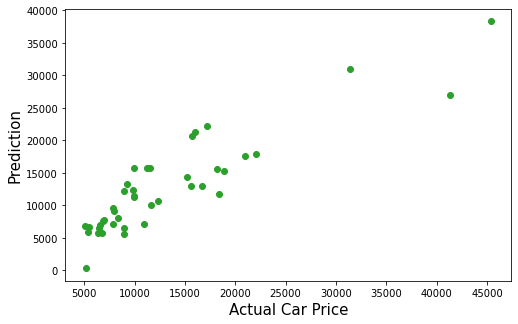

In [31]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = car_price_pred, color = 'Tab:green')
plt.xlabel('Actual Car Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

### Evaluating the model performance by using the following metrics 

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, car_price_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, car_price_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, car_price_pred)))

Mean Absolute Error: 2929.761586348264
Mean Squared Error: 15265564.536422832
Root Mean Squared Error: 3907.117164409436


In [30]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)


print('MAPE:', MAPE(Y_test, car_price_pred)*100, "%")

MAPE: 23.165572200366107 %


## Linear regression summary

####  The linear regression model was trained to predict car prices using the independent variables of number of doors, number of cylinders, engine size, horsepower, city mileage, and highway mileage. The dataset was split into training and testing sets, and the model was evaluated using the coefficient of determination (R-squared) metric. The R-squared value of the trained model on the training data was 0.7987, indicating that around 80% of the variability in the dependent variable (price) could be explained by the independent variables.
#### The model's performance on the testing set was evaluated using the following metrics: 
-R-squared score: 0.840
-Mean absolute error (MAE): 2388.529
-Mean squared error (MSE): 11389046.824
-Root mean squared error (RMSE): 3373.148
#### The intercept and coefficients of the linear regression model were also provided, which can be used to make predictions on new data. It's worth noting that this model is a simple one and other factors not considered here (such as car brand, age, etc.) may also play a significant role in determining car prices.
#### In conclusion, the linear regression model trained in this document can be used as a starting point for predicting car prices based on the provided independent variables. This machine learning model was successful iN acheiving the MAPE % of 23%. 